In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate as interp
from scipy.optimize import curve_fit

### Интерполяция калибровочных кривых

In [3]:
def expon(x, offset, amp, bias, scale):
    return np.exp((x - bias) / scale) * amp + offset

[ -20.06742466   21.71778308 1783.16979616 1498.19427085]
[3995.91433979  105.28961932   24.48617316  858.6145414 ]


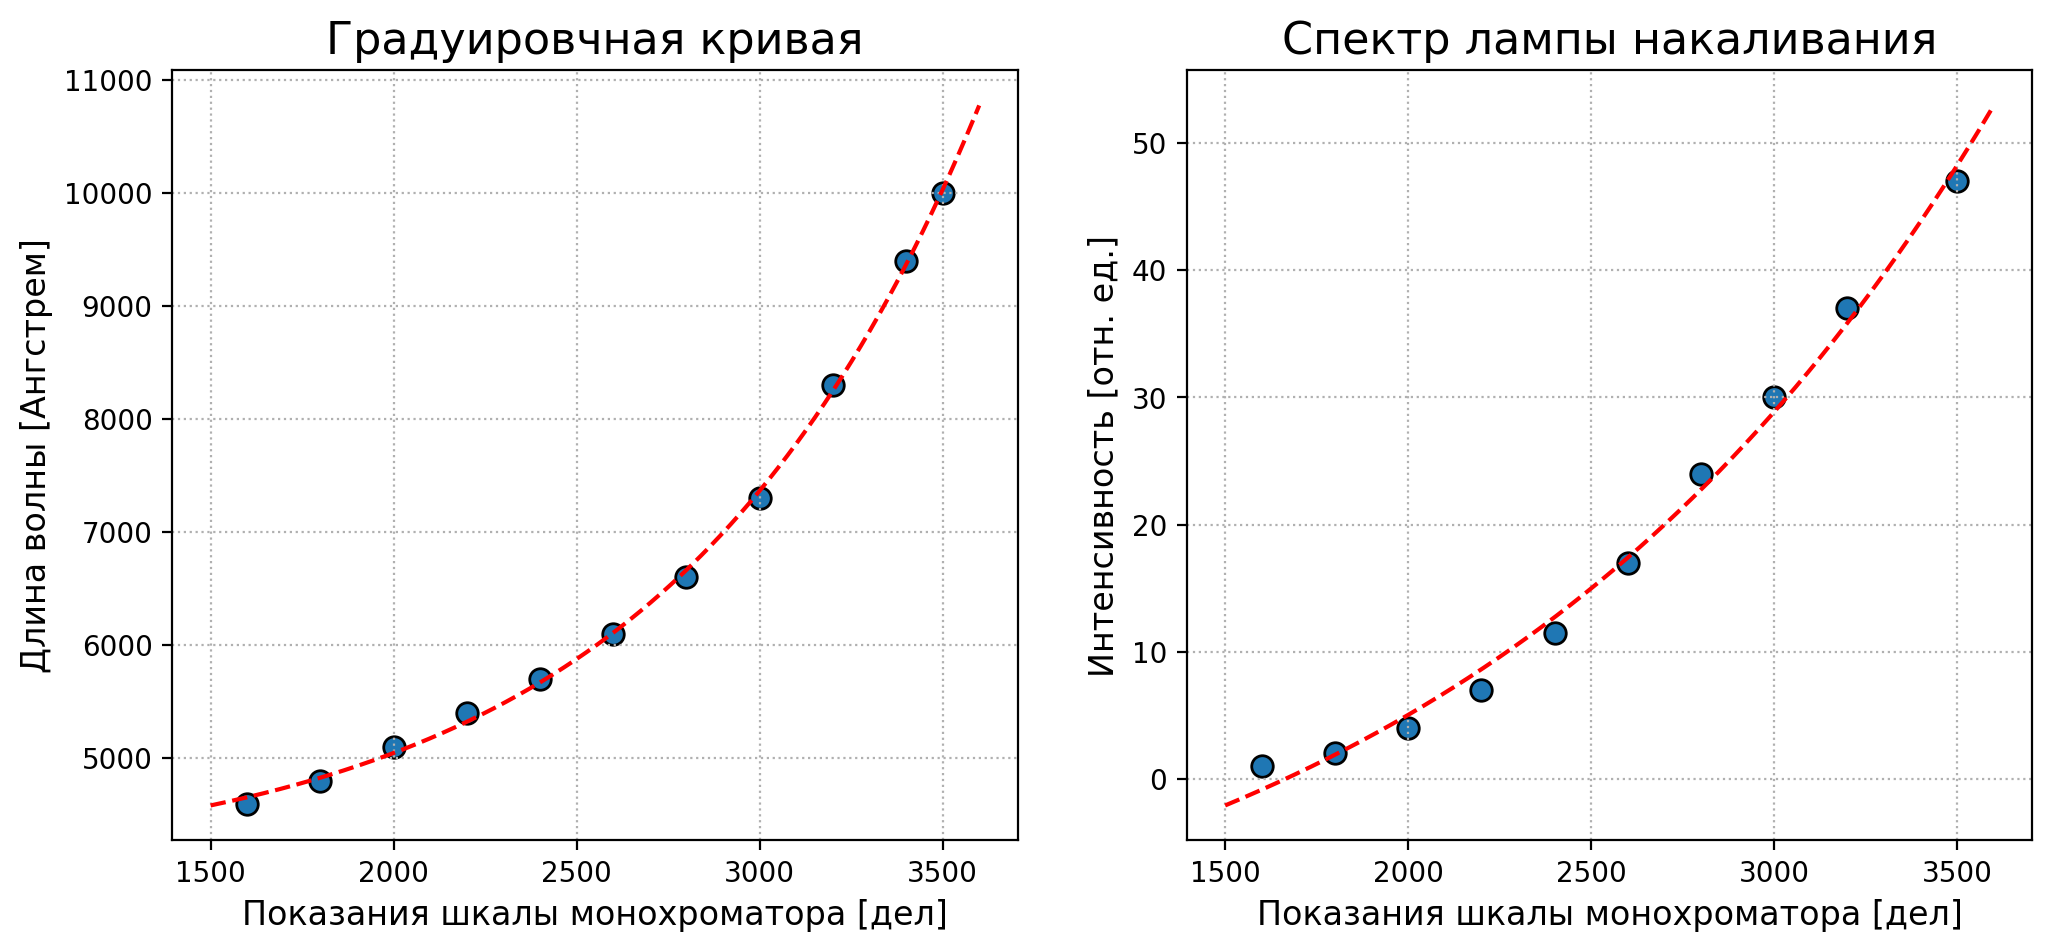

In [4]:
graduirovka = pd.read_csv('graduirovka.csv')
spectrum = pd.read_csv('spectrum.csv')
x_line = np.linspace(1500, 3600, 10000)

param_lambda, _ = curve_fit(expon, graduirovka['monochrom'], graduirovka['energy'],
                            p0 = [4100, 2, 1600, 30])


param_spectrum, _ = curve_fit(expon, spectrum['monochrom'], spectrum['intensity'],
                            p0 = [10, 5, 1200, 30])
print(param_spectrum)

lambda_func = lambda x: expon(x, *param_lambda)
spectrum_func = lambda x: expon(x, *param_spectrum)

print(param_lambda)
fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)
ax[0].scatter(graduirovka['monochrom'], graduirovka['energy'], s = 60, edgecolors = 'black')
ax[0].set_title("Градуировчная кривая", fontsize = 16)
ax[0].set_xlabel("Показания шкалы монохроматора [дел]", fontsize = 12)
ax[0].set_ylabel("Длина волны [Ангстрем]", fontsize = 12)
ax[0].grid(ls = ":")
ax[0].plot(x_line,expon(x_line, *param_lambda),
           color = 'red', linestyle = '--')

ax[1].scatter(spectrum['monochrom'], spectrum['intensity'], s = 60, edgecolors = 'black')
ax[1].plot(x_line, spectrum_func(x_line), color = 'red', linestyle = '--')
ax[1].set_title("Спектр лампы накаливания", fontsize = 16)
ax[1].set_xlabel("Показания шкалы монохроматора [дел]", fontsize = 12)
ax[1].set_ylabel("Интенсивность [отн. ед.]", fontsize = 12)
ax[1].grid(ls = ":")




### Нахождение ширины запрещенной зоны CdSe

In [22]:
data_CdSe = pd.read_csv('CdSe_main.csv')
x = 6.5 * 3 * 1e6/ lambda_func(data_CdSe['monochrom'])
I = (data_CdSe['V'] - 0.0022)  / 40 #Сила Тока в мА
mask = x < 3800
x, I = x[mask], I[mask]
y = I / spectrum_func(data_CdSe['monochrom'])[mask]
y = I
y += np.abs(np.min(y))
y /= np.max(y)
print(x.shape, I.shape)

(35,) (35,)


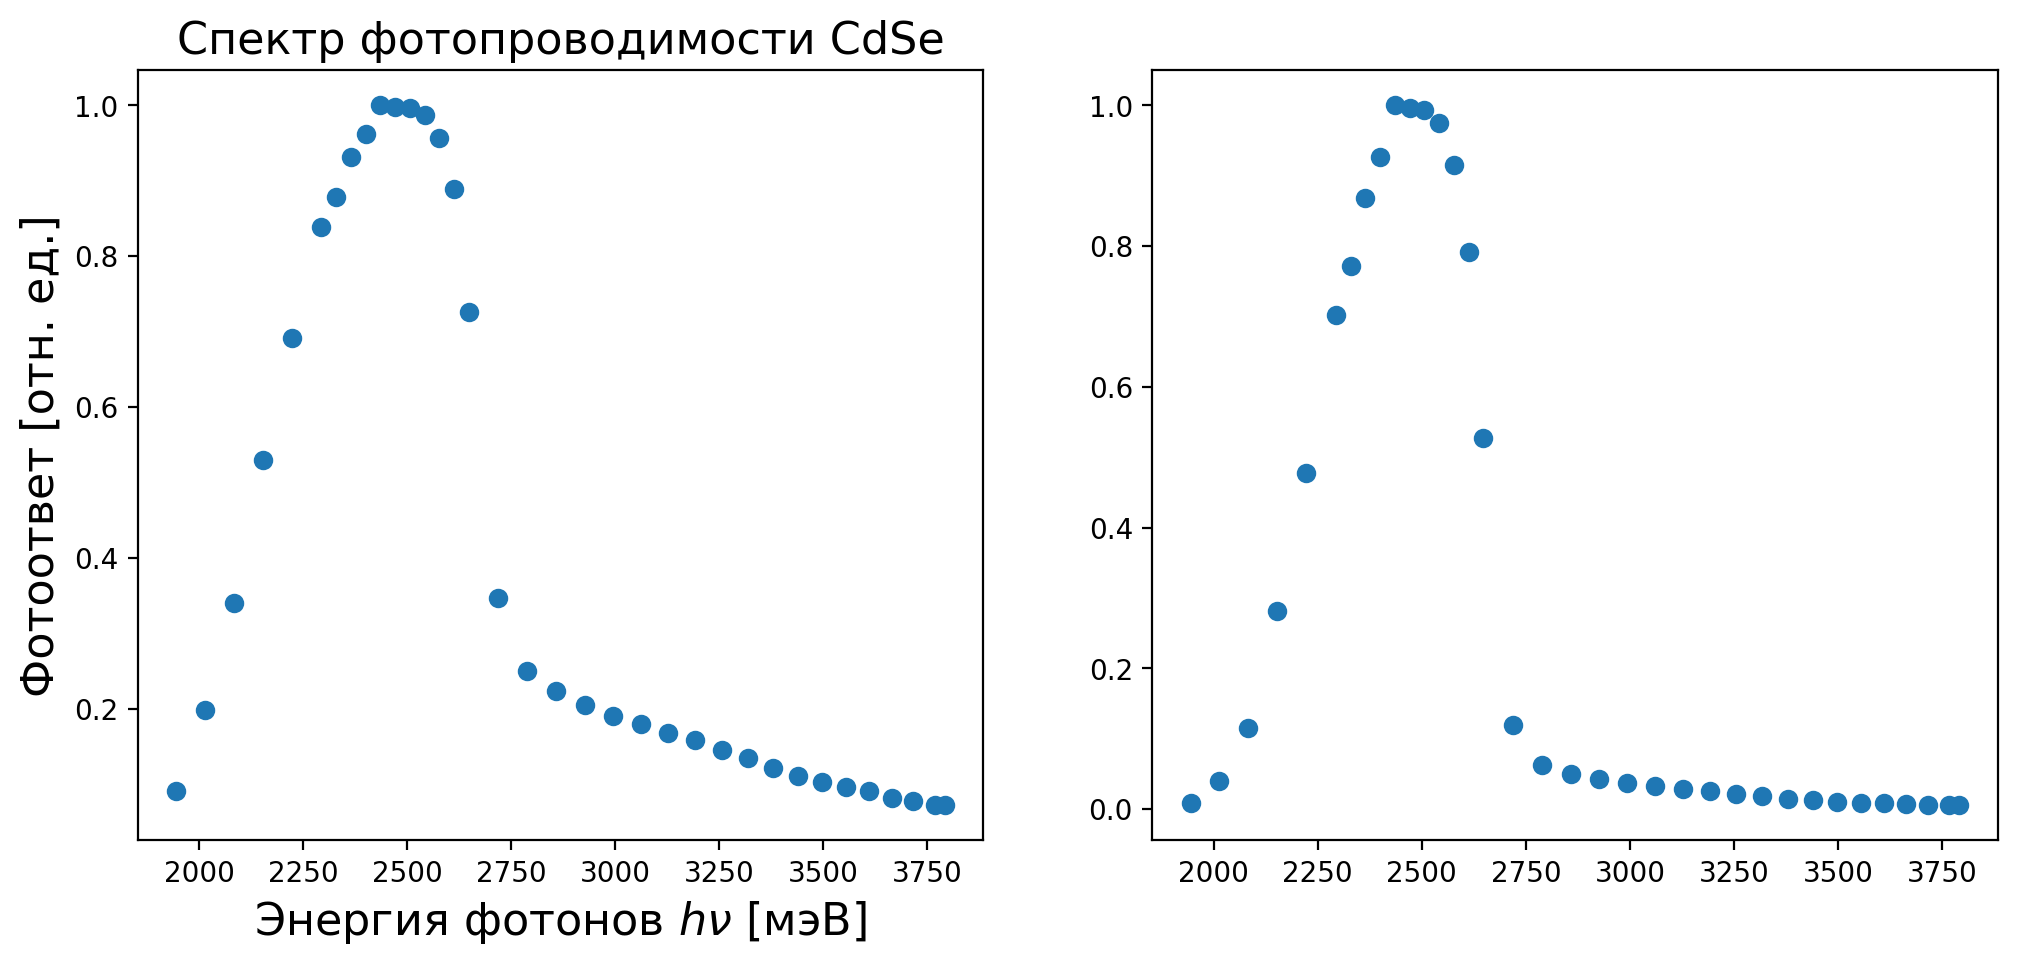

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)
ax[0].scatter(x, y)


ax[0].set_xlabel(r"Энергия фотонов $h \nu$ [мэВ]", fontsize = 16)
ax[0].set_ylabel("Фотоответ [отн. ед.]", fontsize = 16)
ax[0].set_title("Спектр фотопроводимости CdSe", fontsize = 16)

ax[1].scatter(x, np.power(y, 2))


### CdS

In [16]:
data_CdS = pd.read_csv('CdS_main.csv')
x = 6.5 * 2.99792 * 1e6/ lambda_func(data_CdS['monochrom'])
I = data_CdS['V']  / 40 #Сила Тока в мА

mask = x < 3950
x, I = x[mask], I[mask]
y = I / spectrum_func(data_CdS['monochrom'])[mask]
y += np.abs(np.min(y))
y /= np.max(y)


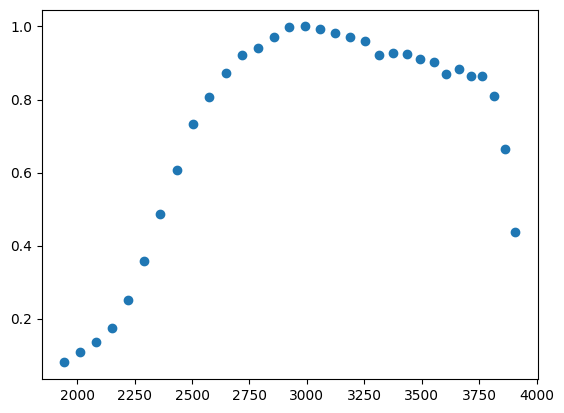

In [17]:
plt.scatter(x, y)

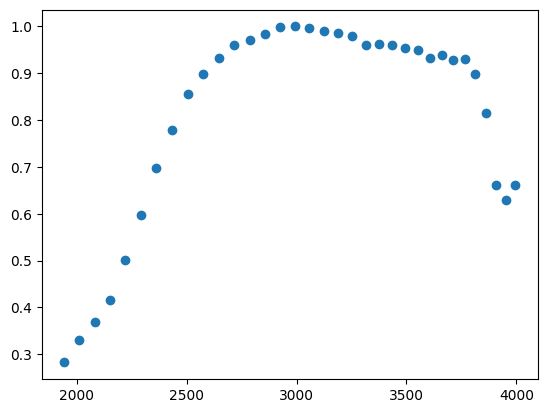

In [11]:
plt.scatter(x, np.sqrt(y))